## 1) Importando as Funções Necessárias

In [703]:
import numpy as np
from matplotlib import *
import pandas as pd
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Tratando o Data Set

In [624]:
data = pd.read_csv("auto.txt")

In [625]:
#Dropando as linha com '?' em dados Categóricos
Cat_e_Price=["make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",
             "engine-location","engine-type","num-of-cylinders","fuel-system","price"]
Drop1 = []
Drop2 = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if(data.loc[i][j]=='?'):
            if(data.iloc[:,j].name in Cat_e_Price):
                Drop1.append(i)
            else:
                Drop2.append(data.iloc[:,j].name)
Drop2 = set(Drop2)
data.drop(Drop1,inplace=True)

In [626]:
for i in range(data.shape[0]):
        data['price'] = data['price'].astype('float64')

In [627]:
#Verivicando Outliers
Out = []

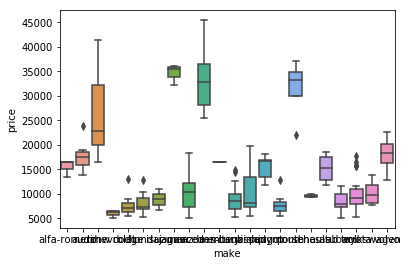

In [628]:
ax=sns.boxplot(x="make",y="price",data=data)

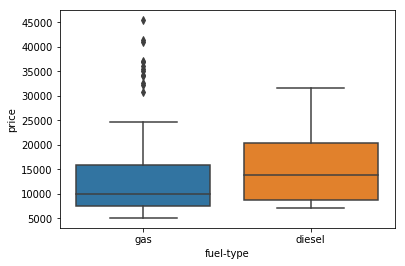

In [629]:
ax=sns.boxplot(x="fuel-type",y="price",data=data)

In [630]:
Out+=list(data["fuel-type"][(data["fuel-type"]=='gas') & (data["price"]>25000)].index)
#Out+=list(data["fuel-type"][(data["fuel-type"]=='diesel') & (data["price"]>25000)].index)

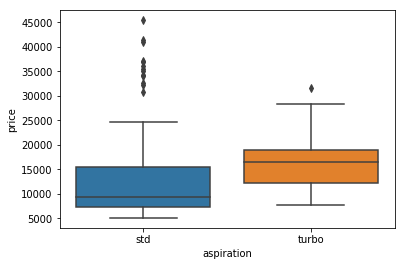

In [631]:
ax=sns.boxplot(x="aspiration",y="price",data=data)

In [632]:
Out+=list(data["aspiration"][(data["aspiration"]=='std') & (data["price"]>25000)].index)
#Out+=list(data["aspiration"][(data["aspiration"]=='turbo') & (data["price"]>25000)].index)

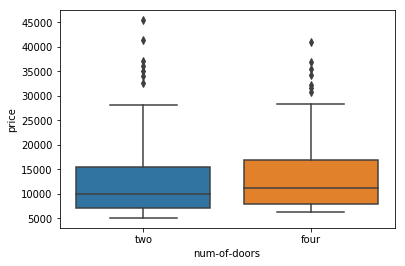

In [633]:
ax=sns.boxplot(x="num-of-doors",y="price",data=data)

In [634]:
#Out+=list(data["num-of-doors"][(data["num-of-doors"]=='two') & (data["price"]>25000)].index)
#Out+=list(data["num-of-doors"][(data["num-of-doors"]=='four') & (data["price"]>25000)].index)

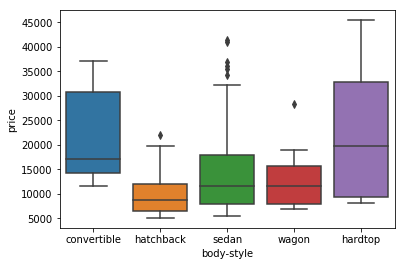

In [635]:
ax=sns.boxplot(x="body-style",y="price",data=data)

In [636]:
#Out+=list(data["body-style"][(data["body-style"]=='hatchback') & (data["price"]>20000)].index)
Out+=list(data["body-style"][(data["body-style"]=='sedan') & (data["price"]>30000)].index)
#Out+=list(data["body-style"][(data["body-style"]=='wagon') & (data["price"]>15000)].index)

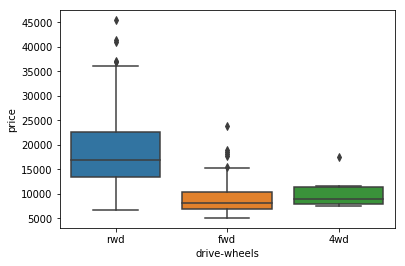

In [637]:
ax=sns.boxplot(x="drive-wheels",y="price",data=data)

In [638]:
#Out+=list(data["drive-wheels"][(data["drive-wheels"]=='rwd') & (data["price"]>35000)].index)
Out+=list(data["drive-wheels"][(data["drive-wheels"]=='fwd') & (data["price"]>14500)].index)
#Out+=list(data["drive-wheels"][(data["drive-wheels"]=='4wd') & (data["price"]>10000)].index)

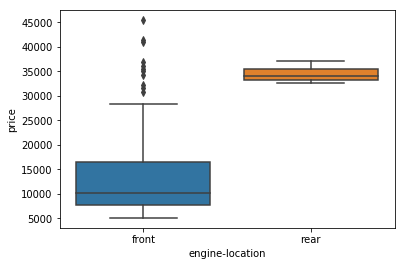

In [639]:
ax=sns.boxplot(x="engine-location",y="price",data=data)

In [640]:
Out+=list(data["engine-location"][(data["engine-location"]=='front') & (data["price"]>25000)].index)
#Out+=list(data["engine-location"][(data["engine-location"]=='rear') & (data["price"]>25000)].index)

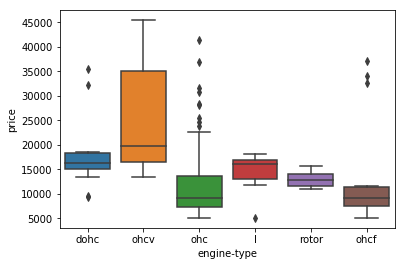

In [641]:
ax=sns.boxplot(x="engine-type",y="price",data=data)

In [642]:
#Out+=list(data["engine-type"][(data["engine-type"]=='dohc') & (data["price"]>20000)].index)
#Out+=list(data["engine-type"][(data["engine-type"]=='dohc') & (data["price"]<15000)].index)
Out+=list(data["engine-type"][(data["engine-type"]=='ohc') & (data["price"]>20000)].index)
#Out+=list(data["engine-type"][(data["engine-type"]=='ohcf') & (data["price"]>10000)].index)
#Out+=list(data["engine-type"][(data["engine-type"]=='dohc') & (data["price"]<15000)].index)

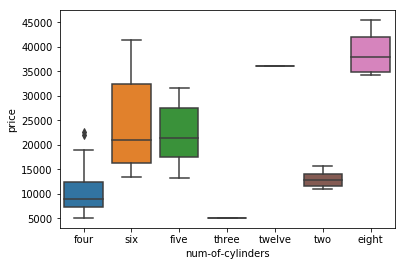

In [643]:
ax=sns.boxplot(x="num-of-cylinders",y="price",data=data)

In [644]:
#Out+=list(data["num-of-cylinders"][(data["num-of-cylinders"]=='four') & (data["price"]>20000)].index)

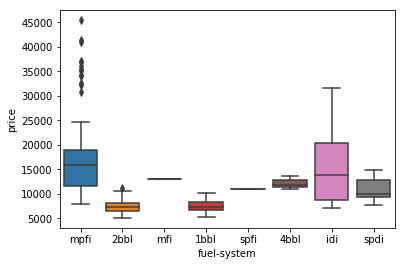

In [645]:
ax=sns.boxplot(x="fuel-system",y="price",data=data)

In [646]:
Out+=list(data["fuel-system"][(data["fuel-system"]=='mpfi') & (data["price"]>25000)].index)
#Out+=list(data["fuel-system"][(data["fuel-system"]=='2bbl') & (data["price"]>10000)].index)

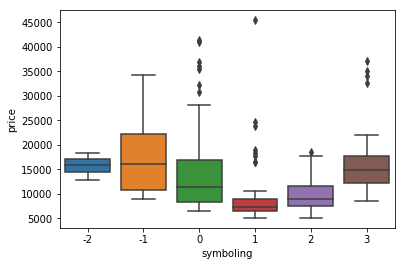

In [647]:
ax=sns.boxplot(x="symboling",y="price",data=data)

In [648]:
#Out+=list(data["symboling"][(data["symboling"]==0) & (data["price"]>25000)].index)
#Out+=list(data["symboling"][(data["symboling"]==1) & (data["price"]>10000)].index)
#Out+=list(data["symboling"][(data["symboling"]==2) & (data["price"]>15500)].index)
#Out+=list(data["symboling"][(data["symboling"]==3) & (data["price"]>20000)].index)


In [649]:
#Eliminando as duplicatas transformando Out em Conjunto depois Listando
Out = set(Out)
Out=list(Out)

In [651]:
#Retirando os Outliers
data.drop(Out,inplace=True)

In [664]:
#Transformando Dados Categóricos em Binários

Cat_1 = pd.get_dummies(data["make"])
Cat_2 = pd.get_dummies(data["fuel-type"])
Cat_3 = pd.get_dummies(data["aspiration"])
Cat_4 = pd.get_dummies(data["num-of-doors"])
Cat_5 = pd.get_dummies(data["body-style"])
Cat_6 = pd.get_dummies(data["drive-wheels"])
Cat_8 = pd.get_dummies(data["engine-type"])
Cat_9 = pd.get_dummies(data["num-of-cylinders"])
Cat_10 = pd.get_dummies(data["fuel-system"])
Cat_11 = pd.get_dummies(data["symboling"])


data.drop('make',axis=1,inplace=True)
data['alfa-romero']=Cat_1["alfa-romero"]
data['audi']=Cat_1["audi"]
data['bmw']=Cat_1["bmw"]
data['chevrolet']=Cat_1["chevrolet"]
data['dodge']=Cat_1["dodge"]
data['honda']=Cat_1["honda"]
data['isuzu']=Cat_1["isuzu"]
data['mazda']=Cat_1["mazda"]
data['mitsubishi']=Cat_1["mitsubishi"]
data['nissan']=Cat_1["nissan"]
data['peugot']=Cat_1["peugot"]
data['plymouth']=Cat_1["plymouth"]
data['renault']=Cat_1["renault"]
data['saab']=Cat_1["saab"]
data['subaru']=Cat_1["subaru"]
data['toyota']=Cat_1["toyota"]
data['volkswagen']=Cat_1["volkswagen"]
data['volvo']=Cat_1["volvo"]


Cat_2.drop('gas',axis=1,inplace=True)
data.drop('fuel-type',axis=1,inplace=True)
data['diesel']=Cat_2["diesel"]# se disel é igual a 0 então é gás


Cat_3.drop('std',axis=1,inplace=True)
data.drop('aspiration',axis=1,inplace=True)
data['turbo']=Cat_3["turbo"] #se turbo é igual a 0 então é std


Cat_4.drop('two',axis=1,inplace=True)
data.drop('num-of-doors',axis=1,inplace=True)
data['four']=Cat_4["four"] # se four é igual a 0 então é two


data.drop('body-style',axis=1,inplace=True)
data['convertible']=Cat_5["convertible"]
data['hardtop']=Cat_5["hardtop"]
data['hatchback']=Cat_5["hatchback"]
data['sedan']=Cat_5["sedan"]
data['wagon']=Cat_5["wagon"]

data.drop('drive-wheels',axis=1,inplace=True)
data['4wd']=Cat_6["4wd"]
data['fwd']=Cat_6["fwd"]
data['rwd']=Cat_6["rwd"]


data.drop('engine-location',axis=1,inplace=True)

data.drop('engine-type',axis=1,inplace=True)
data['dohc']=Cat_8["dohc"]
data['l']=Cat_8["l"]
data['ohc']=Cat_8["ohc"]
data['ohcf']=Cat_8["ohcf"]
data['ohcv']=Cat_8["ohcv"]
data['rotor']=Cat_8["rotor"]

data.drop('num-of-cylinders',axis=1,inplace=True)
data['five']=Cat_9["five"]
data['four']=Cat_9["four"]
data['six']=Cat_9["six"]
data['three']=Cat_9["three"]
data['two']=Cat_9["two"]


data.drop('fuel-system',axis=1,inplace=True)
data['1bbl']=Cat_10["1bbl"]
data['2bbl']=Cat_10["2bbl"]
data['4bbl']=Cat_10["4bbl"]
data['idi']=Cat_10["idi"]
data['mfi']=Cat_10["mfi"]
data['mpfi']=Cat_10["mpfi"]
data['spdi']=Cat_10["spdi"]
data['spfi']=Cat_10["spfi"]

data.drop('symboling',axis=1,inplace=True)
data['Sy3']=Cat_11.iloc[:,5]
data['Sy2']=Cat_11.iloc[:,4]
data['Sy1']=Cat_11.iloc[:,3]
data['Sy0']=Cat_11.iloc[:,2]
data['Sy-1']=Cat_11.iloc[:,1]
data['Sy-2']=Cat_11.iloc[:,0]


In [666]:
#Substituir o '?' por 0
data = data.apply(lambda x:x.replace('?','0'))

In [667]:
#Transformando os dados em floats
for i in range(data.shape[1]):
        data[data.iloc[:,i].name] = data[data.iloc[:,i].name].astype('float64')

In [668]:
#Preenchendo os Dados faltantes com a média
for coluna in Drop2:
    data[coluna][data[coluna]==0] = data[coluna][data[coluna]==0].apply(lambda x: x+data[coluna].mean())

In [669]:
#Escalonando os Dados: existem features com com ordens de grandeza distintas
Scala_Colum = ['engine-size','normalized-losses','wheel-base','length','width','height','curb-weight','bore','stroke',
               'compression-ratio','horsepower','peak-rpm','city-mpg','wheel-base','highway-mpg']
for coluna in Scala_Colum:
    data[coluna]=data[coluna].apply(lambda x:(x-data[coluna].min(axis=0))/(data[coluna].max(axis=0)-data[coluna].min(axis=0)))


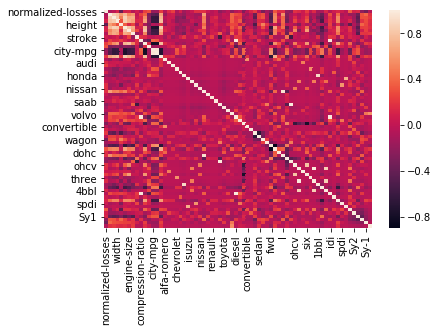

In [670]:
#Matriz de Correlação dos Dados
#Retirar alguns pontos brancos
sns.heatmap(data.corr())

In [671]:
#Avaliando as Altas Correlações
Matriz_Correc=data.corr()
Alt_Correc = set([])
for i in range(Matriz_Correc.shape[0]):
    for j in range(Matriz_Correc.shape[1]):
        if(Matriz_Correc.iloc[i,j]>=0.8 and Matriz_Correc.iloc[:,j].name!=Matriz_Correc.iloc[i,:].name):
            Alt_Correc.add(frozenset({Matriz_Correc.iloc[i,:].name,Matriz_Correc.iloc[:,j].name,Matriz_Correc.iloc[i,j]}))



In [672]:
Alt_Correc

{frozenset({0.821466248424788, 'curb-weight', 'engine-size'}),
 frozenset({0.8584005875191199, 'curb-weight', 'price'}),
 frozenset({0.9723341311015415, 'city-mpg', 'highway-mpg'}),
 frozenset({0.843842328255117, 'curb-weight', 'width'}),
 frozenset({1.0, 'diesel', 'idi'}),
 frozenset({0.8061607644862571, 'ohcv', 'six'}),
 frozenset({0.9844132692234002, 'compression-ratio', 'diesel'}),
 frozenset({0.9844132692234002, 'compression-ratio', 'idi'}),
 frozenset({0.8633810452333812, '4bbl', 'rotor'}),
 frozenset({0.9139506113139337, '1bbl', 'honda'}),
 frozenset({1.0, 'rotor', 'two'}),
 frozenset({0.8633810452333812, '4bbl', 'two'}),
 frozenset({1.0, 'ohcf', 'subaru'}),
 frozenset({0.8395851026824794, 'length', 'width'}),
 frozenset({0.8563559192158618, 'length', 'wheel-base'}),
 frozenset({0.9543534975524548, 'l', 'peugot'}),
 frozenset({0.8687594050778918, 'curb-weight', 'length'})}

In [673]:
#1)
Drop_Fetures = {}
DF = set([])
for k in Alt_Correc:
    for u in k:
        if(type(u)==str):
            Drop_Fetures[u] = 0
            DF.add(u)

#2)

for i in DF:
    for k in Alt_Correc:
        if(i in k):
            Drop_Fetures[i]+=1

for item in sorted(Drop_Fetures,key = Drop_Fetures.get):
    print("{} : {}".format(item,Drop_Fetures[item]))


engine-size : 1
price : 1
highway-mpg : 1
city-mpg : 1
ohcv : 1
six : 1
1bbl : 1
honda : 1
subaru : 1
ohcf : 1
wheel-base : 1
l : 1
peugot : 1
width : 2
idi : 2
diesel : 2
compression-ratio : 2
4bbl : 2
rotor : 2
two : 2
length : 3
curb-weight : 4


In [674]:
#Removendo as Fetures de Alta Correlação
data.drop('curb-weight',axis=1,inplace=True)
data.drop('length',axis=1,inplace=True)
data.drop('width',axis=1,inplace=True)
data.drop('engine-size',axis=1,inplace=True)
data.drop('wheel-base',axis=1,inplace=True)
data.drop('rotor',axis=1,inplace=True)
data.drop('compression-ratio',axis=1,inplace=True)
data.drop('horsepower',axis=1,inplace=True)
data.drop('highway-mpg',axis=1,inplace=True)

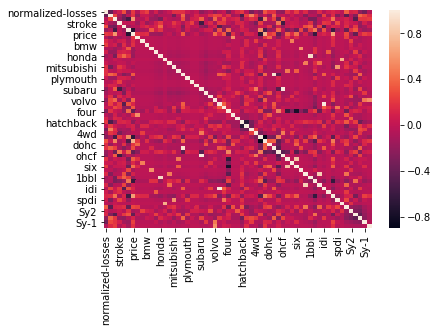

In [675]:
#Alguns Pontos Brancos foram tirados
sns.heatmap(data.corr())

## Dividindo o Data Set e Treinando o Modelo

In [742]:
X_treino , X_teste, y_treino, y_teste = train_test_split(data,data['price'],test_size=0.95,random_state=4)

In [743]:
lin_model = LinearRegression()

In [744]:
lin_model.fit(X_treino,y_treino.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Avaliando a Acurácia do Modelo

In [745]:
predictions = lin_model.predict(X_teste)

In [746]:
mean_squared_error(y_teste,predictions)

6.399389404747405e-08

In [747]:
y_teste=np.array(y_teste)
#predictions[i]
for i in range(len(y_teste)):
    print("{} : {}".format(y_teste[i],predictions[i]))

7975.0 : 7974.999985294241
6649.0 : 6649.000049856707
9095.0 : 9094.999889090812
6938.0 : 6937.999996610057
7198.0 : 7197.999952452808
11850.0 : 11849.999730376732
7295.0 : 7295.000196377657
12945.0 : 12944.999651236234
11900.0 : 11900.000147794932
16925.0 : 16924.99945889982
9989.0 : 9988.999893870856
15985.0 : 15984.999567140385
13499.0 : 13498.99969383463
6692.0 : 6692.000007642087
13499.0 : 13498.999693980057
7463.0 : 7463.000177396488
18280.0 : 18279.999398366643
7957.0 : 7957.000076368084
8778.0 : 8778.000046352672
11248.0 : 11247.99979234312
6855.0 : 6854.999957024323
16500.0 : 16499.999507340443
15580.0 : 15579.9998401793
6479.0 : 6478.9999937159855
9995.0 : 9994.999824618479
18150.0 : 18149.999741130294
9980.0 : 9979.999822946524
21485.0 : 21484.99923327804
7898.0 : 7898.0001168960325
7895.0 : 7894.999983825017
9988.0 : 9987.999891814035
16430.0 : 16429.99942765166
10198.0 : 10198.000035272129
6377.0 : 6377.000014317777
10295.0 : 10294.999823575443
10245.0 : 10244.999815698317

# Obs: Depois fazer o algoritmo de Machine Learning eu mesmo e estudar mais as fetures do dataset, estudar o data set.